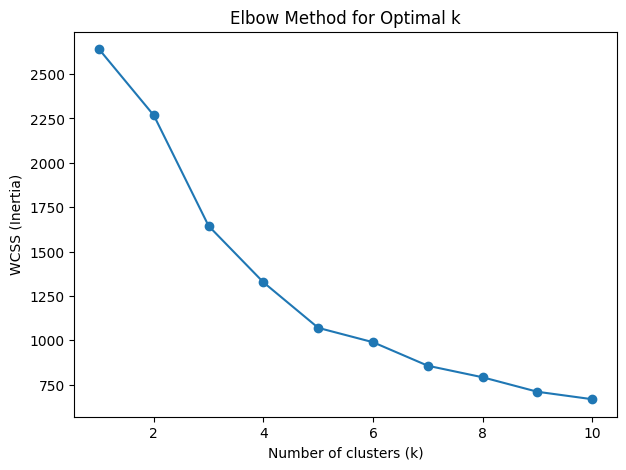

In [ ]:
# ====================================
# CLUSTER EVALUATION – ELBOW METHOD
# ====================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1) Load dataset
url = "https://raw.githubusercontent.com/akay6483/mmml-ecommerce/main/dataset/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# Drop extra index column if present
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# 2) Select features used for K-Means
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features]

# 3) Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) Elbow method: compute WCSS (inertia) for different k
wcss = []   # Within-Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)   # inertia_ = total WCSS for that k

# 5) Plot k vs WCSS
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()
